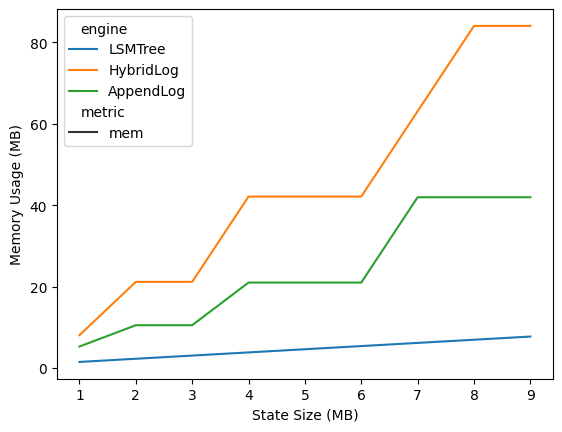


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{mem.png}
    \caption{mem}
    \label{fig:mem}
\end{figure}



In [6]:
from sys import path
path.append('..')
from sys import getsizeof
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_memory(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    for k, v in zip(keys_set, vals_set):
        db[k] = v
    
    res.append({'metric': 'mem', 'value': getsizeof(db) / 1000_000})

    return res


df = run(
    [5], [5], list(range(100_000, 1_000_000, 100_000)), [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [21_000],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'replica': [None]
    }],
    [measure_memory], {}
)

data = df[['n_items', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['mem'])]
data['n_items'] = data['n_items'] / 100_000

lineplot(data, 'n_items', 'value', 'mem',
         hue='engine',
         style='metric',
         X='State Size (MB)', Y='Memory Usage (MB)',
         save=True, show=True)
